# Assignment 7 (Week 9)

>**Note**: 

```
- Late submissions are penalized.
- Only GitHub submissions are acceptable.
- Remember to read the `instructions` carefully.
```

## Name: Abidat A Akin-Adedotun

<br>

## Please show and display ALL your calculations and results.


In [1]:
# Built-in library
import itertools
import re
from typing import Any, Optional, Sequence, Union

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

%matplotlib inline

# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000


# Black code formatter (Optional)
# %load_ext lab_black

> Data source is from **Kaggle**. To complete this assignment, you **must create an account** with **Kaggle**.

- The data can be found [here](https://www.kaggle.com/datasets/nenamalikah/nlp-ulta-skincare-reviews).

### Data Dictionary

```
- Review Title: The title of the review.
- Review_Text: The full text of the review.
- Verified_Buyer: Whether the reviewer is a verified buyer of the product.
- Review_Date: The date the review was published relative to the review scrape date.
- Review_Location: The location of the reviewer.
- Review_Upvotes: How many times the review was upvoted by other reviewers.
- Review_Downvotes: How many times the review was downvoted by other reviewers.
- Product: The name of the product the review was issued for.
- Brand: The brand of the product.
- Scrape Date: The date the data was pulled from the web.
```

### Objectives

```
1. Exploratory Data Analysis.

2. Research and experimentation.

3. Sentiments Analysis.

```

## Note: 

- The assignment **should** be submitted through a `public` GitHub repository.

<br><hr>

###  Qs 1. Explore the data. What can the reviews tell us about the products? Do most buyers have common skincare issues? What issues did the products help solve or exacerbate?


In [2]:
# Import and load data
skincare = "Ulta Skincare Reviews.csv"
data = pd.read_csv(skincare)
print(f"Shape of Data: {data.shape}\n")

data.head(3)

Shape of Data: (4150, 10)



,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
1,You need this,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
2,Clean skin,Enjoy this product so much ! I look forward to using it - really feels great.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23


In [3]:
# Check data type

data.dtypes

Review_Title        object
Review_Text         object
Verified_Buyer      object
Review_Date         object
Review_Location     object
Review_Upvotes       int64
Review_Downvotes     int64
Product             object
Brand               object
Scrape_Date         object
dtype: object

In [4]:
# Check for NaNs
data.isna().sum()

Review_Title        0
Review_Text         2
Verified_Buyer      0
Review_Date         0
Review_Location     1
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
dtype: int64

In [5]:
data["Product"].value_counts(normalize=True).mul(100)

Daily Superfoliant             36.144578
Daily Microfoliant             36.144578
Hydro Masque Exfoliant         19.277108
Multi-Vitamin Thermafoliant     8.433735
Name: Product, dtype: float64

In [6]:
# Extract the reviews column
Reviews = data["Review_Title"]

# Calculate the sentiment of each review
sentiments = Reviews.apply(lambda x: TextBlob(x).sentiment.polarity)

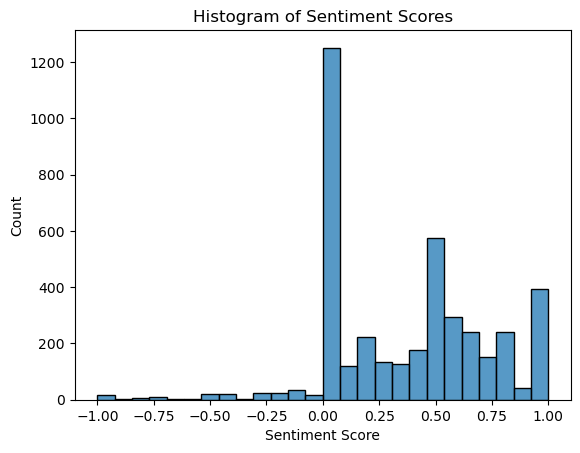

In [7]:
# Plot a histogram of the sentiment scores
sns.histplot(sentiments, kde=False)
plt.xlabel("Sentiment Score")
plt.ylabel("Count")
plt.title("Histogram of Sentiment Scores")
plt.show()

In [9]:
# Identify the most frequent words in the reviews
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words="english")
X = vectorizer.fit_transform(Reviews)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0]))
top_words = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)[:10]

# Print the top words and their frequencies
print("Top words:")
for word, freq in top_words:
    print(f"{word}: {freq}")

Top words:
love: 738
product: 727
skin: 427
great: 389
buy: 354
amazing: 280
exfoliant: 197
best: 176
gentle: 139
good: 135


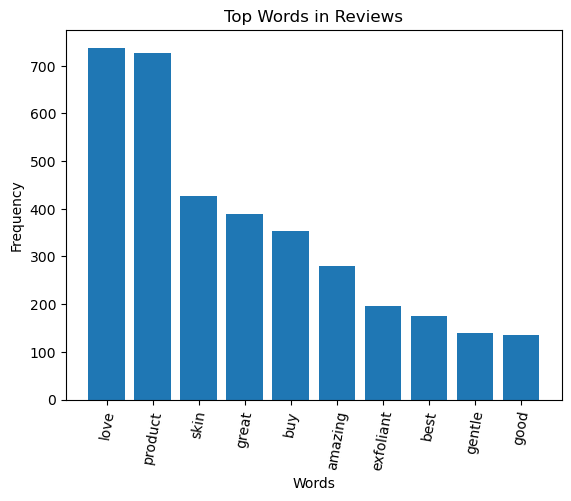

In [36]:
# Plot a bar chart of the top words
plt.bar([word[0] for word in top_words], [word[1] for word in top_words])
plt.xlabel("Words")
plt.tick_params(axis="x", rotation=80)
plt.ylabel("Frequency")
plt.title("Top Words in Reviews")
plt.show()

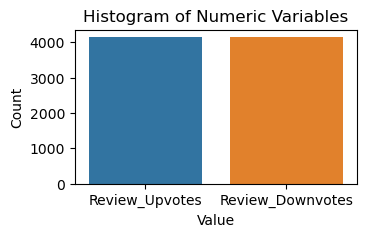

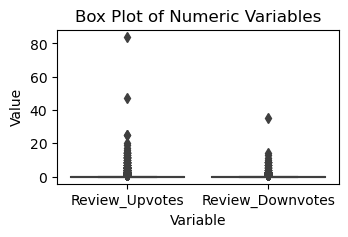

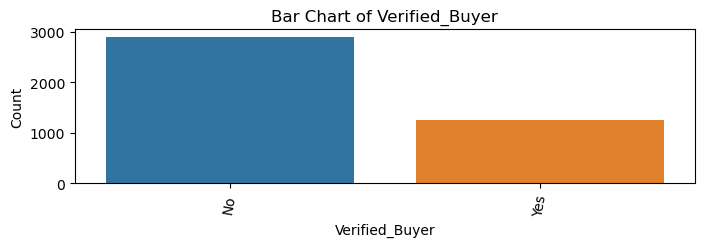

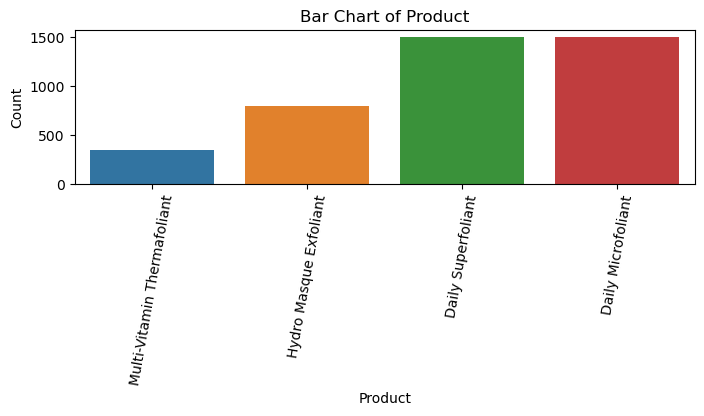

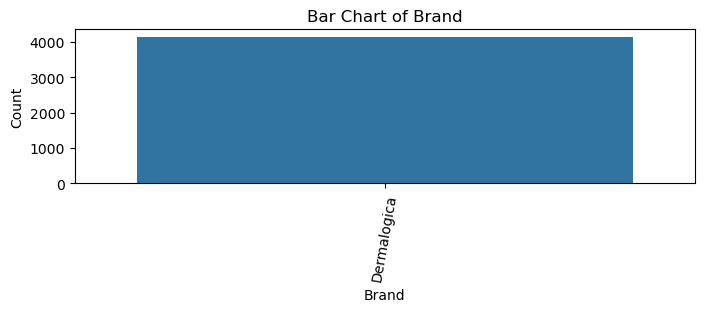

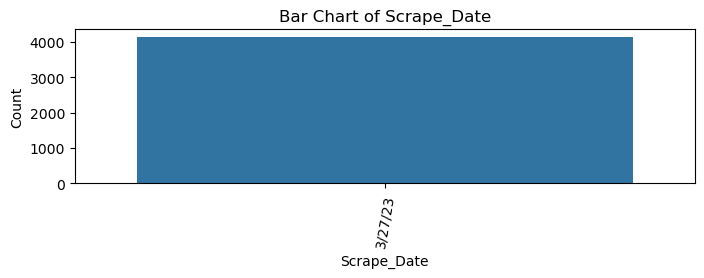

In [34]:
# Plot a histogram of the numeric variables

plt.figure(figsize=[8,2])
plt.subplot(1,2,1)
numeric_vars = ["Review_Upvotes", "Review_Downvotes"]
sns.countplot(data=data[numeric_vars])
plt.xlabel("Value")
plt.ylabel("Count")
plt.title("Histogram of Numeric Variables")


# Plot a box plot of the numeric variables
plt.figure(figsize=[8,2])
plt.subplot(1,2,1)
sns.boxplot(data=data[numeric_vars])
plt.xlabel("Variable")
plt.ylabel("Value")
plt.title("Box Plot of Numeric Variables")


# Plot a bar chart of the categorical variables
categorical_vars = ["Verified_Buyer", "Product", "Brand", "Scrape_Date"]
for var in categorical_vars:
    plt.figure(figsize=[8,2])
    sns.countplot(data=data, x=var)
    plt.xlabel(var)
    plt.tick_params(axis="x", rotation=80)
    plt.ylabel("Count")
    plt.title(f"Bar Chart of {var}")


###  Qs 2. Create a wordcloud showing the words/phrases commonly associated with each product.

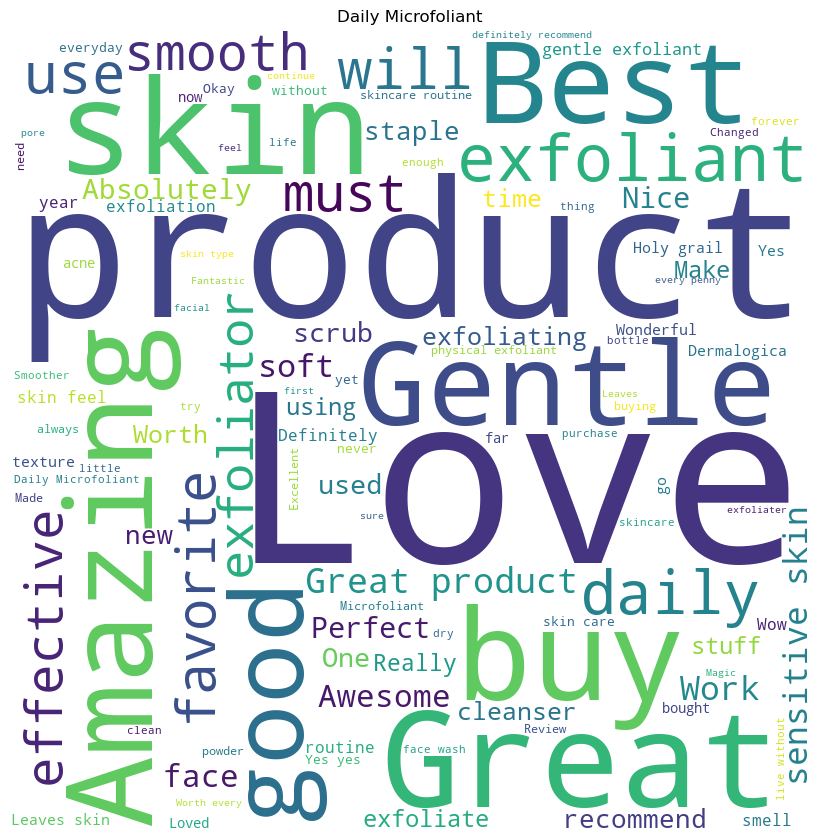

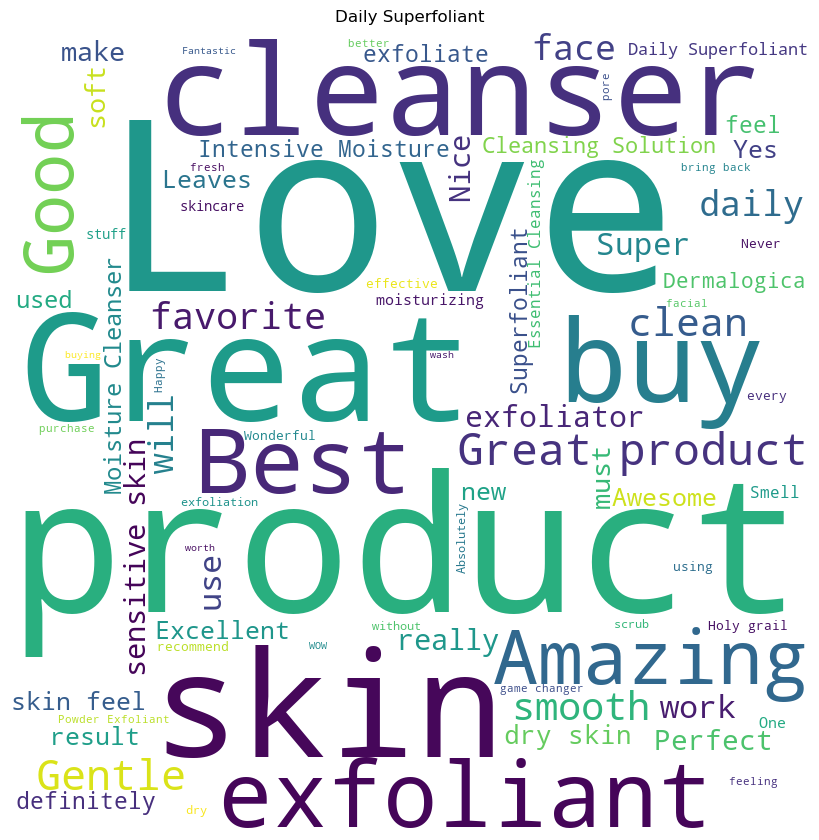

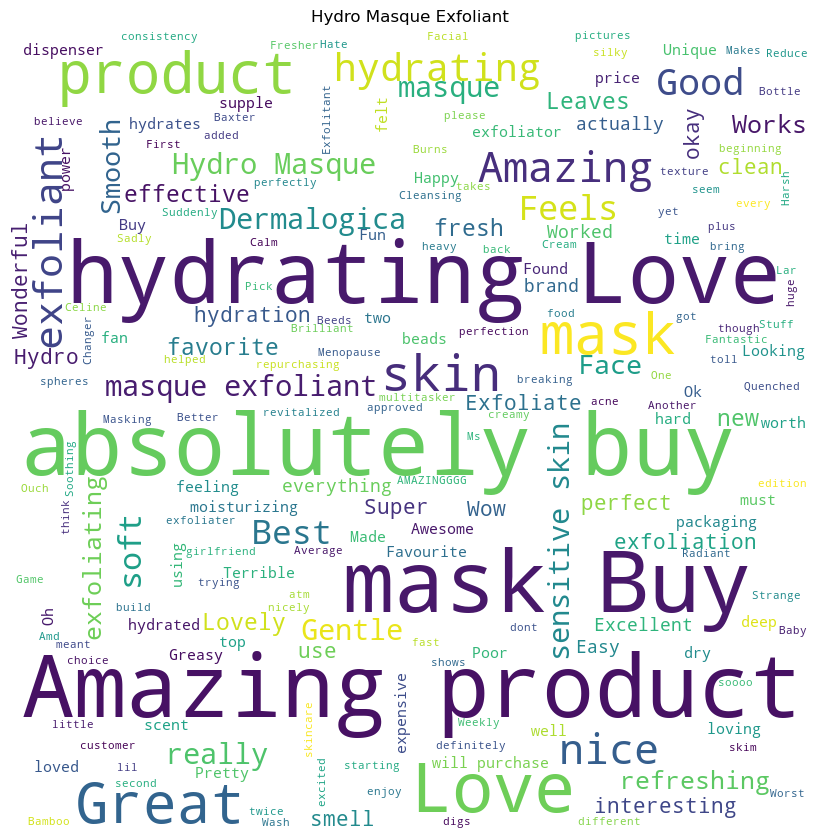

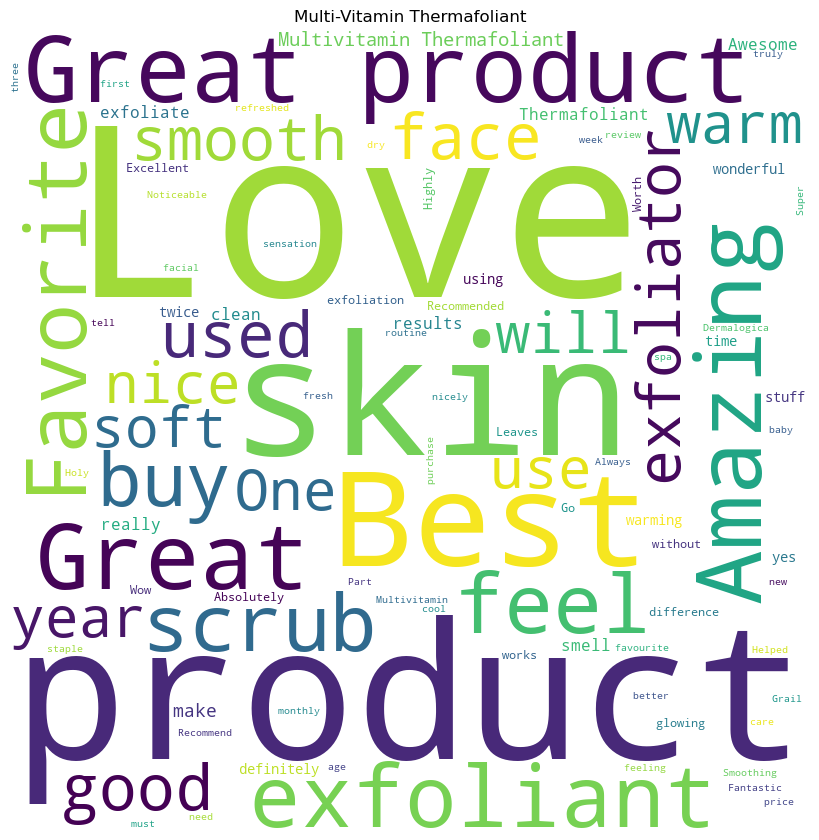

In [12]:
from wordcloud import WordCloud

# Group data by product and concatenate the descriptions
Product_Descriptions = data.groupby('Product')['Review_Title'].apply(lambda x: ' '.join(x))

# Create a wordcloud for each product
for Product, Review_Title in Product_Descriptions.items():
    # Generate the wordcloud image
    wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=None, min_font_size=10).generate(Review_Title)
    
    # Plot the wordcloud
    plt.figure(figsize=(8,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title(Product)
    plt.show()

### Qs 3. Perform sentiment analysis. Build a ML model that can predict whether a review is positive or negative.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [17]:
# Create a TextBlob object for each review and extract the polarity
data['polarity'] = data['Review_Title'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Map polarity to sentiment labels (positive or negative)
data['sentiment'] = data['polarity'].apply(lambda x: 'positive' if x > 0 else 'negative')


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Review_Title'], data['sentiment'], test_size=0.2, random_state=42)

# Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Train a LinearSVC model on the training data
clf = LinearSVC()
clf.fit(X_train_vect, y_train)

# Evaluate the model on the testing data
accuracy = clf.score(X_test_vect, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.9433734939759036
